In [173]:
import time

from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.common.exceptions import ElementClickInterceptedException
import pprint
import pandas as pd

In [263]:
# insert your q
q = 'רמת אלון חיפה'

In [269]:
DRIVER_PATH = '/home/bar/Documents/chromedriver'

q = '%20'.join(q.split(' '))
url = f'https://www.nadlan.gov.il/?search={q}'
browser = webdriver.Chrome(executable_path=DRIVER_PATH)
browser.get(url)
# now wait for load

browser.implicitly_wait(5)

browser.manage().window().maximize();

AttributeError: 'WebDriver' object has no attribute 'manage'

In [231]:
times_to_scroll = 7

for i in range(times_to_scroll):
    browser.execute_script('window.scrollTo(1, 1080);')
    # now wait let load the comments
    time.sleep(5)


In [236]:
class infinite_scroll(object):
   
    def __init__(self, last):
    
        self.last = last

    def __call__(self, driver):
        new = driver.execute_script('return document.body.scrollHeight')  
        if new > self.last:
            return new
        else:
            return False
    

In [237]:
last_height = browser.execute_script('return document.body.scrollHeight')
print(last_height)
flag=1

while flag==1:
    browser.execute_script('window.scrollTo(0,document.body.scrollHeight)')
    try:
        w = wait(browser, 10)

        new_height = w.until(infinite_scroll( last_height))
        last_height = new_height

    except:
        print("End of page reached")
        flag = 0

2988
End of page reached


In [238]:
table = browser.find_elements_by_class_name("tableRow")
len(table)

501

In [239]:
relevant_col_names = ['תאריך מכירה', 'כתובת', 'גוש חלקה -תת חלקה', 'סוג נכס', 'חדרים', 'קומה', 'מ"ר','סכום']
relevant_col_dict = {c:[] for c in relevant_col_names}

In [240]:
for idx in range(len(table)):
    row = table[idx]
    cols = row.find_elements_by_class_name("tableCol")

    # naive map - in absence of unique tags or title per col
    relevant_col_dict['תאריך מכירה'].append(cols[0].find_elements_by_tag_name("div")[0].text)
    relevant_col_dict['כתובת'].append(cols[1].find_elements_by_tag_name("div")[0].text)
    relevant_col_dict['גוש חלקה -תת חלקה'].append(cols[2].find_elements_by_tag_name("div")[0].text)
    relevant_col_dict['סוג נכס'].append(cols[3].find_elements_by_tag_name("div")[0].text)
    relevant_col_dict['חדרים'].append(cols[4].find_elements_by_tag_name("div")[0].text)
    relevant_col_dict['קומה'].append(cols[5].find_elements_by_tag_name("div")[0].text)
    relevant_col_dict['מ"ר'].append(cols[6].find_elements_by_tag_name("div")[0].text)
    relevant_col_dict['סכום'].append(cols[7].find_elements_by_tag_name("div")[0].text)


In [247]:
nadlan_df = pd.DataFrame.from_dict(relevant_col_dict)
nadlan_df

,תאריך מכירה,כתובת,גוש חלקה -תת חלקה,סוג נכס,חדרים,קומה,"מ""ר",סכום
0,08.07.2020,אזולאי יעקב השופט 5,11198-236-46,דירה בבית קומות,4,קרקע,82.17,"1,620,000"
1,18.06.2020,חסידי אומות העולם 1,11879-6-52,דירה בבית קומות,4.5,שלישית,92.16,"1,650,000"
2,16.06.2020,שלון 21,11880-19-7,דירה בבית קומות,3,רביעית,76.60,"1,410,000"
3,11.06.2020,אלתר אליעזר 1,11879-22-11,דירה בבית קומות,3,שניה,75.57,"1,130,000"
4,26.05.2020,סכנין אברהם 13,11880-16-37,דירה בבית קומות,2,שניה,59.21,"850,000"
...,...,...,...,...,...,...,...,...
496,25.03.1999,,11879-18-19,דירה בבית קומות,4,שלישית,75,"710,000"
497,03.02.1999,חסידי אומות העולם 3,11879-6-68,דירה בבית קומות,4,שניה,84,"796,000"
498,03.07.1998,,11879-7-16,דירה בבית קומות,4,שניה,112,"844,000"
499,10.05.1998,וילנאי זאב 10,11879-17-11,דירה בבית קומות,4,ראשונה,91.90,"848,000"


In [244]:
nadlan_df.to_csv('data\{}.csv, index=False)

In [248]:
nadlan_df['תאריך מכירה'] = pd.to_datetime(nadlan_df['תאריך מכירה'])
nadlan_df['חדרים'] = nadlan_df['חדרים'].astype(float)
nadlan_df['סכום'] = nadlan_df['סכום'].apply(lambda x: int(''.join(x.split(','))))
nadlan_df['מ"ר'].replace(' ', -1, inplace=True)
nadlan_df['מ"ר'] = nadlan_df['מ"ר'].astype(float)
nadlan_df['קומה'].value_counts()

שניה                139
ראשונה               89
שלישית               71
קרקע                 59
רביעית               22
                     20
חמישית               11
קרקע+ראשונה          10
קרקע ראשונה           9
קרקע ראשונה שניה      9
שישית                 9
שביעית                8
שלישית ורביעית        5
עשירית                4
קרקע וראשונה          4
חמש עשרה              4
שבע עשרה              3
תשיעית                3
שמינית                3
חמישית ושישית         3
ארבע עשרה             2
ראשונה שניה           2
שש עשרה               2
ראשונה+שניה           2
רביעית+חמישית         2
אחת עשרה              2
שלוש עשרה             1
שמונה עשרה            1
שניה שלישית           1
מרתף                  1
Name: קומה, dtype: int64

In [249]:

# Some houses have multiple floors 
# you may encouter higher floors - add them to the dict
floors_dict = {'שבע עשרה':17,'שמונה עשרה':18,'תשיעית':9,'מרתף':-1,'תשע עשרה':19,'עשרים':20,'אחת עשרה':11,'קרקע':0,'ראשונה':1,'שניה':2,'שתיים עשרה':12,'שלוש עשרה':13,'ארבע עשרה':14,'חמש עשרה':15,'שש עשרה':16,'שלישית':3,'רביעית':4, 'חמישית':5, 'שישית':6,'שביעית':7,'שמינית':8,'תשיעית':9,'עשירית':10}

def find_minimal(floors, floors_dict=floors_dict):
    
    missing_value = 200
    if 'עשרה' in floors:
        return floors
    
    fl = floors.split('+') if '+' in floors else floors.split(' ') if ' ' in floors else []
    return min([floors_dict[x] if x in floors_dict.keys() else missing_value for x in fl])

nadlan_df['קומת כניסה'] = nadlan_df['קומה'].apply(lambda x: floors_dict[x] if x in floors_dict.keys() else find_minimal(x))

nadlan_df['קומת כניסה'].value_counts()

 2      140
 1       93
 0       91
 3       76
 4       24
 200     20
 5       14
 6        9
 7        8
 15       4
 10       4
 9        3
 8        3
 17       3
 11       2
 14       2
 16       2
 13       1
 18       1
-1        1
Name: קומת כניסה, dtype: int64

In [250]:
nadlan_df

,תאריך מכירה,כתובת,גוש חלקה -תת חלקה,סוג נכס,חדרים,קומה,"מ""ר",סכום,קומת כניסה
0,2020-08-07,אזולאי יעקב השופט 5,11198-236-46,דירה בבית קומות,4.0,קרקע,82.17,1620000,0
1,2020-06-18,חסידי אומות העולם 1,11879-6-52,דירה בבית קומות,4.5,שלישית,92.16,1650000,3
2,2020-06-16,שלון 21,11880-19-7,דירה בבית קומות,3.0,רביעית,76.60,1410000,4
3,2020-11-06,אלתר אליעזר 1,11879-22-11,דירה בבית קומות,3.0,שניה,75.57,1130000,2
4,2020-05-26,סכנין אברהם 13,11880-16-37,דירה בבית קומות,2.0,שניה,59.21,850000,2
...,...,...,...,...,...,...,...,...,...
496,1999-03-25,,11879-18-19,דירה בבית קומות,4.0,שלישית,75.00,710000,3
497,1999-03-02,חסידי אומות העולם 3,11879-6-68,דירה בבית קומות,4.0,שניה,84.00,796000,2
498,1998-03-07,,11879-7-16,דירה בבית קומות,4.0,שניה,112.00,844000,2
499,1998-10-05,וילנאי זאב 10,11879-17-11,דירה בבית קומות,4.0,ראשונה,91.90,848000,1


In [251]:
# filter according to address, rooms etc
s='אזולאי'
max_rooms = 5
min_rooms = 3
min_size = 70
max_enter = 2
min_date = nadlan_df['תאריך מכירה'].min()
max_sum = 7000000

temp_df = nadlan_df.loc[(nadlan_df['כתובת'].apply(lambda x: s in x)) & (nadlan_df['חדרים'] >= min_rooms) & (nadlan_df['חדרים'] <= max_rooms)& (nadlan_df['מ"ר'] >= min_size)& (nadlan_df['קומת כניסה'] >= max_enter) & (nadlan_df['תאריך מכירה'] >= min_date)& (nadlan_df['סכום'] <= max_sum)]

temp_df

,תאריך מכירה,כתובת,גוש חלקה -תת חלקה,סוג נכס,חדרים,קומה,"מ""ר",סכום,קומת כניסה
21,2019-09-18,אזולאי יעקב השופט 5,11198-236-45,דירה בבית קומות,3.0,שלישית,74.37,1490000,3
60,2018-04-11,אזולאי יעקב השופט 7,11198-237-2,דירה בבית קומות,3.0,שניה,73.00,1280000,2
137,2016-06-23,אזולאי יעקב השופט 7,11198-237-3,דירה בבית קומות,3.0,,78.00,1320000,200
205,2014-09-18,אזולאי יעקב השופט 7,11198-237-4,דירה בבית קומות,4.0,,90.00,1530000,200


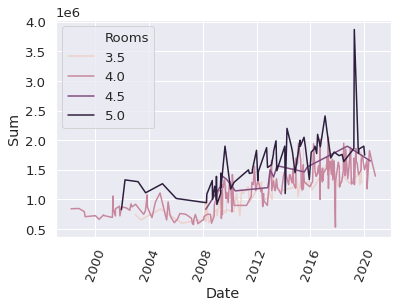

In [257]:
import seaborn as sns
import matplotlib.pyplot as plt

nadlan_plot_df = nadlan_df.rename(columns={'תאריך מכירה':'Date','כתובת':'Address', 'גוש חלקה -תת חלקה':'Lot', 'סוג נכס':'Type','חדרים':'Rooms', 'מ"ר':'Size (m^2)', 'קומה':'Floor', 'קומת כניסה':'Enterance Floor', 'סכום':'Sum'})

sns.set(font_scale=1.2)
chart = sns.lineplot('Date', 'Sum', hue='Rooms', data=nadlan_plot_df.loc[(nadlan_plot_df.Rooms > 3)&(nadlan_plot_df.Rooms <= 5)]);
plt.xticks(rotation=70);
